<a href="https://colab.research.google.com/github/jpradeesh3800/ml/blob/master/Structured_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
test_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

*To start with a dataset,always have a look at few columns and check for null vales*

In [63]:
train_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [64]:
train_data.isnull().any()

survived              False
sex                   False
age                   False
n_siblings_spouses    False
parch                 False
fare                  False
class                 False
deck                  False
embark_town           False
alone                 False
dtype: bool

*Since There are no null values. Our job is simplified.*

*Although few of the columns were filled with UnKnown, We will consider it as a feature attribute*

*Check Which of the following are categorical and numeric column*

In [65]:
train_data.alone.unique()

array(['n', 'y'], dtype=object)

In [66]:
test_data.alone.unique()

array(['y', 'n'], dtype=object)

In [67]:
train_data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [68]:
test_data.embark_town.unique()

array(['Southampton', 'Queenstown', 'Cherbourg', 'unknown'], dtype=object)

In [69]:
train_data.deck.unique()

array(['unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [70]:
test_data.deck.unique()

array(['unknown', 'E', 'C', 'D', 'F', 'B', 'A'], dtype=object)

In [71]:
train_data.parch.unique()

array([0, 1, 2, 5, 3, 4])

In [72]:
test_data.parch.unique()

array([0, 1, 2, 4, 6, 3, 5])

In [73]:
train_data['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [74]:
test_data['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [75]:
train_data.sex.unique()

array(['male', 'female'], dtype=object)

In [76]:
test_data.sex.unique()

array(['male', 'female'], dtype=object)

In [77]:
def find_categorical(train_data,test_data):
    columns = train_data.columns
    for i in columns:
        p = train_data[i].unique()
        q = test_data[i].unique()
        if len(p)<10:
            print("{:20s} : {} {}".format(i,p,q))
find_categorical(train_data,test_data)

survived             : [0 1] [0 1]
sex                  : ['male' 'female'] ['male' 'female']
n_siblings_spouses   : [1 0 3 4 2 5 8] [0 3 2 1 5 4 8]
parch                : [0 1 2 5 3 4] [0 1 2 4 6 3 5]
class                : ['Third' 'First' 'Second'] ['Third' 'First' 'Second']
deck                 : ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E'] ['unknown' 'E' 'C' 'D' 'F' 'B' 'A']
embark_town          : ['Southampton' 'Cherbourg' 'Queenstown' 'unknown'] ['Southampton' 'Queenstown' 'Cherbourg' 'unknown']
alone                : ['n' 'y'] ['y' 'n']


*We can now conclude that*

1.   Sex
2.   alone
3.   embark_town
4.   class
5.   deck

*These columns are Categorical features.*





In [78]:
train_data.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [79]:
train_data.survived.value_counts()

0    384
1    243
Name: survived, dtype: int64

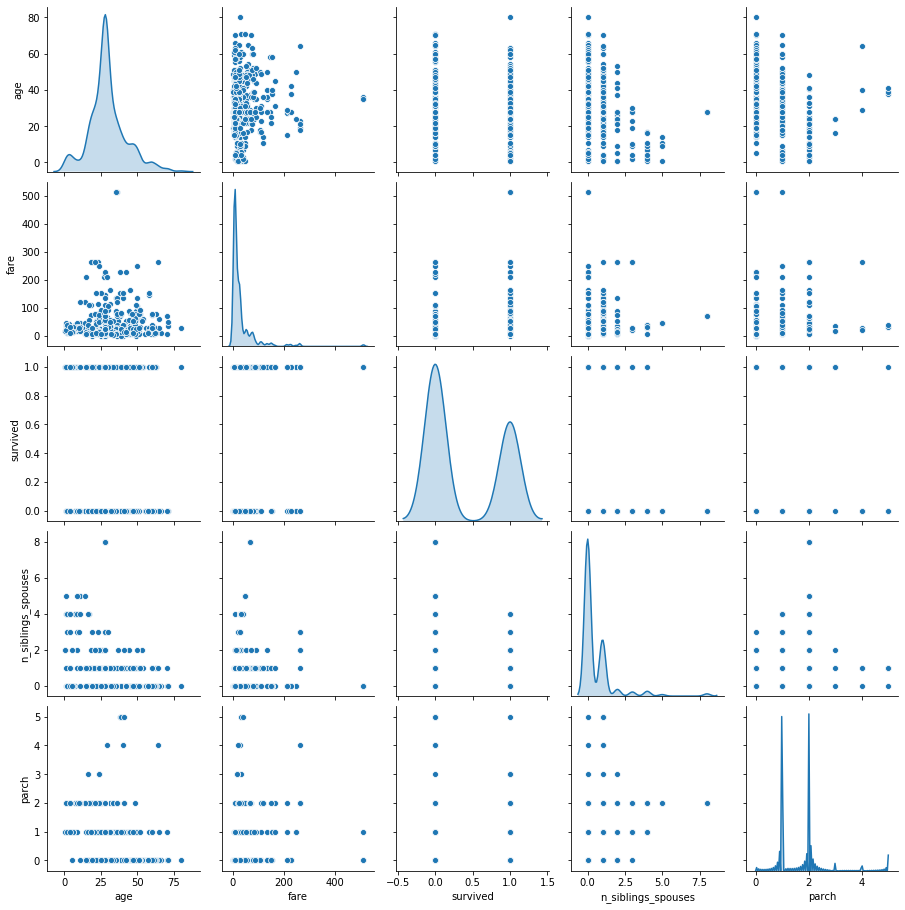

In [80]:
sns.pairplot(train_data[['age','fare','survived','n_siblings_spouses','parch']],diag_kind='kde')

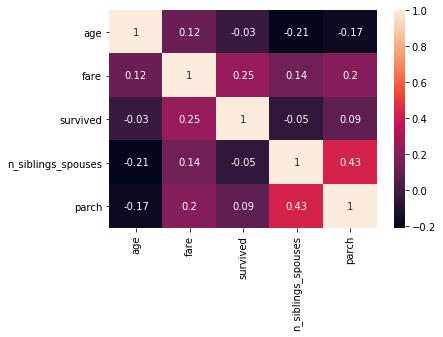

In [81]:
corr_matrix = train_data[['age','fare','survived','n_siblings_spouses','parch']].corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

In [82]:
train_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [83]:
train_data.isnull().any()

survived              False
sex                   False
age                   False
n_siblings_spouses    False
parch                 False
fare                  False
class                 False
deck                  False
embark_town           False
alone                 False
dtype: bool

In [0]:
feature_columns = []
categorical_features = ['sex',
'alone',
'embark_town',
'class',
'deck',]

for key in categorical_features :
    z = tf.feature_column.categorical_column_with_vocabulary_list(key,train_data[key].unique())
    feature_columns.append(tf.feature_column.indicator_column(z))

In [85]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [0]:
numeric_features =['n_siblings_spouses',
                   'parch',
                ]
for key in numeric_features:
    z = tf.feature_column.numeric_column(key)
    feature_columns.append(z)

In [87]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=

In [0]:
age = tf.feature_column.numeric_column('age')
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[10,20,30,40,50,60,70])
feature_columns.append(age_buckets)

In [0]:
fare  = tf.feature_column.numeric_column('fare')
fare_buckets = tf.feature_column.bucketized_column(fare,boundaries = list(range(50,500,50)))
feature_columns.append(fare_buckets)

In [90]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((dict(train_data),train_data.survived)).shuffle(1000).batch(32)

In [92]:
model = tf.keras.Sequential([
                             tf.keras.layers.DenseFeatures(feature_columns),
                             tf.keras.layers.Dense(128,activation='relu'),
                            #  tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(train_ds,epochs=20)

Epoch 1/20
20/20 [==============================] - 1s 58ms/step - loss: 0.6028 - accuracy: 0.6117
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7442
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.8010
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8110
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.8154
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8294
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.8379
Epoch 8/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8434
Epoch 9/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8466
Epoch 10/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8533
Epoch 11/20
20/20 

In [0]:
test_ds = tf.data.Dataset.from_tensor_slices((dict(test_data),test_data.survived)).shuffle(1000).batch(32)

In [94]:
results = model.evaluate(test_ds)
results

9/9 [==============================] - 0s 37ms/step - loss: 0.4501 - accuracy: 0.8447


[0.450145145257314, 0.844697]

In [0]:
y_pred = model.predict(test_ds)

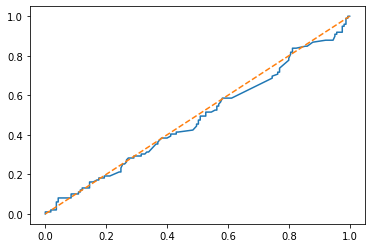

In [96]:
from sklearn.metrics import roc_curve
fpr,tpr,_ = roc_curve(test_data.survived,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.show()